# Understanding Descriptive Statistics

Import the necessary libraries here:

In [21]:
# Libraries
import numpy as np
import pandas as pd
import random as r
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [24]:
def rollthedice():
    rolls = []
    for i in range(0,10):
        rolls.append(r.choice(range(1,7)))
    df = pd.DataFrame(rolls)
    df.rename(columns={0: 'Values'}, inplace=True)
    return df
df = rollthedice()

In [26]:
df

,Values
0,1
1,3
2,3
3,5
4,4
5,6
6,1
7,3
8,1
9,4


#### 2.- Plot the results sorted by value.

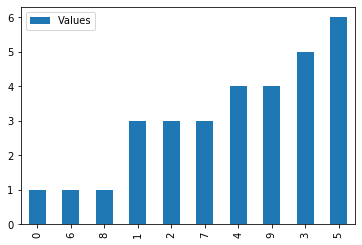

In [27]:
df.sort_values('Values').plot(kind = 'bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

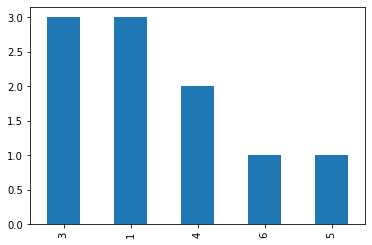

In [28]:
df['Values'].value_counts().plot(kind='bar')


In [ ]:
"""
Each number appears between once (1,3,6) and three time (5)
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [32]:
# your code here
def mymean():
    count = 0
    sum_stg = 0
    for i in df['Values']:
        count += 1
        sum_stg += i
    res = sum_stg/count
    print(res)
    
    
# your code here
def mymean2(x):
    count = 0
    sum_stg = 0
    for i in x:
        count += 1
        sum_stg += i
    res = sum_stg/count
    print(res)
    
def c_mean():
    mean = sum(df['Values'])/len(df)
    return mean
c_mean()

3.1

In [33]:
df['Values'].value_counts().plot(kind='bar')

TypeError: c_mean() takes 0 positional arguments but 1 was given

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [34]:
df['Values'].value_counts()

3    3
1    3
4    2
6    1
5    1
Name: Values, dtype: int64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [35]:
def mymedian(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None



In [36]:
mymedian([1,2,3,4,5])

3

In [38]:
mymedian(df['Values'])

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [39]:
def quartiles(lst,q):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1)// 2

    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])*q
    

In [40]:
quartiles(df['Values'],0.25)# your code here

1.5

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

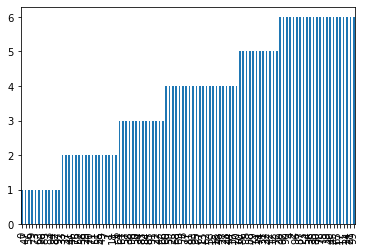

In [41]:
# your code here
df_100 = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col=0)
df_100['value'].sort_values().plot(kind='bar')

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [45]:
# your code here
def c_mean():
    mean = sum(df_100['value'])/len(df_100)
    return mean
c_mean()
df_100

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
5,5,5
6,6,2
7,7,2
8,8,4
9,9,1


#### 3.- Now, calculate the frequency distribution.


In [50]:
df_100['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

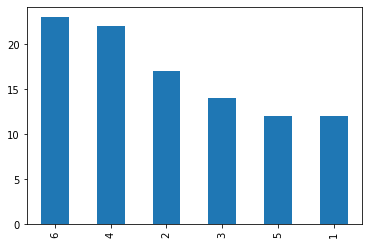

In [49]:
df_100['value'].value_counts().plot(kind='bar')

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

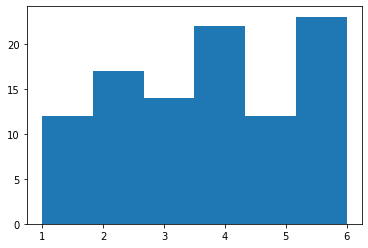

In [59]:
# your code here
df_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv', index_col=0)
plt.hist(df_100['value'], bins = 6)

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

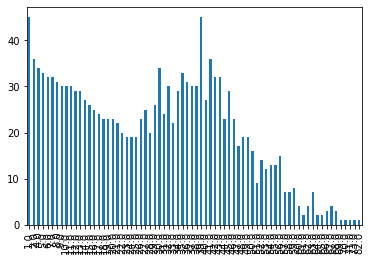

In [8]:
ages2 = pd.read_csv('../data/ages_population.csv') 
#df['observation'].value_counts().sort_values().plot(kind='bar')
#df.index.value_counts().plot(kind='bar')
ages2['observation'].value_counts().plot(kind='bar')
ages2['observation'].value_counts().sort_index().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D59089FD0>]],
      dtype=object)

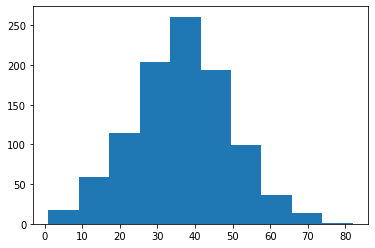

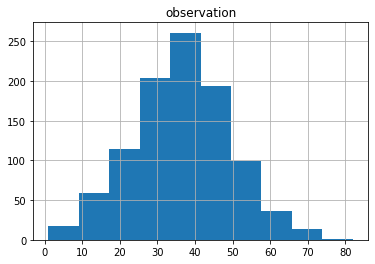

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
plt.hist(ages2['observation'])
ages2.hist()



In [60]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <a list of 10 Patch objects>)

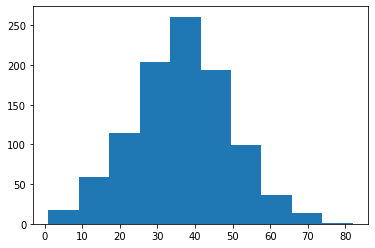

In [61]:
plt.hist(ages['observation'])

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [11]:
# your code here
print(ages2['observation'].mean())
print(ages2['observation'].describe())

36.56
count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64


In [62]:
import statistics

In [12]:
ages2['observation'].mean()

36.56

In [13]:
statistics.stdev(ages2['observation'])

12.81649962597677

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

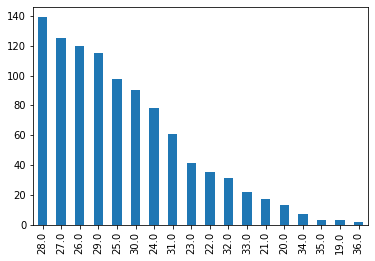

In [14]:
df4_3 = pd.read_csv('../data/ages_population2.csv')

df4_3['observation'].value_counts().plot(kind='bar', sort_columns=True)

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

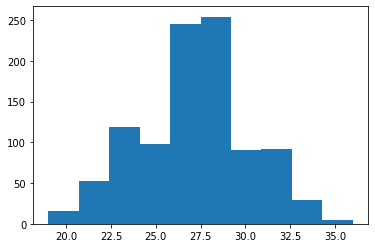

In [15]:
plt.hist(df4_3['observation'])

In [99]:
vals = df['observation'].sort_values()

incidence = 0
count = 1
lst1 = []
lst2 = []

for i in vals:
    if i in lst1:
        count += 1
    else:
        lst1.append(i)
        lst2.append([i,count])
        count = 1
print (lst2)

[[19.0, 1], [20.0, 3], [21.0, 13], [22.0, 17], [23.0, 35], [24.0, 41], [25.0, 78], [26.0, 98], [27.0, 120], [28.0, 125], [29.0, 139], [30.0, 115], [31.0, 90], [32.0, 61], [33.0, 31], [34.0, 22], [35.0, 7], [36.0, 3]]


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [16]:
df4_3['observation'].mean()
statistics.stdev(df4_3['observation'])

2.9698139326891835

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

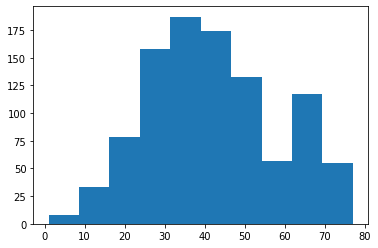

In [4]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.head()
plt.hist(ages3['observation'])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [6]:
# your code here
import statistics
ages3['observation'].mean()
statistics.stdev(ages3['observation'])

16.14470595986593

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
#Quartile 10%
print(np.percentile(ages3['observation'],10))

#quartile 25%
print(np.percentile(ages3['observation'],25))

#quartile 50%
print(np.percentile(ages3['observation'],50))

#quartile 75%
print(np.percentile(ages3['observation'],75))

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""